## DECISION TREE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
import joblib 

In [2]:
df_train = pd.read_csv("statistics_10_train.csv" , sep = ',')
df_test = pd.read_csv("statistics_10_test.csv" , sep = ',')

In [3]:
X_train = df_train[['Kurtosis', 'Impulse factor', 'RMS', 'Margin factor', 'Skewness',
               'Shape factor', 'Peak to peak', 'Crest factor']].values
y_train = df_train['Tipo'].values
X_test = df_test[['Kurtosis', 'Impulse factor', 'RMS', 'Margin factor', 'Skewness',
               'Shape factor', 'Peak to peak', 'Crest factor']].values
y_test = df_test['Tipo'].values

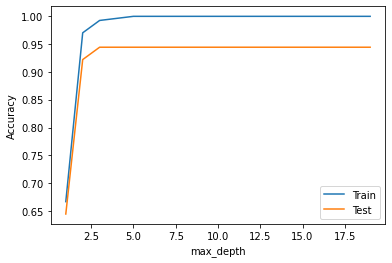

In [4]:
max_depth_values = range(1, 20)
scores_train = []
scores_test = []
for m in max_depth_values:
    treeModel = tree.DecisionTreeClassifier(random_state = 0, max_depth = m)
    treeModel.fit(X_train, y_train)
    scores_train.append(treeModel.score(X_train, y_train))
    scores_test.append(treeModel.score(X_test, y_test))
plt.figure()
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.plot(max_depth_values, scores_train, label = 'Train')
plt.plot(max_depth_values, scores_test, label = 'Test')
plt.legend()

In [5]:
treeModel = tree.DecisionTreeClassifier(random_state = 0, max_depth = 7)
treeModel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

[Text(200.88000000000002, 199.32, 'X[6] <= 0.14\ngini = 0.667\nsamples = 270\nvalue = [90, 90, 90]'),
 Text(167.40000000000003, 163.07999999999998, 'X[0] <= 3.726\ngini = 0.5\nsamples = 180\nvalue = [0, 90, 90]'),
 Text(66.96000000000001, 126.83999999999999, 'X[4] <= 0.397\ngini = 0.12\nsamples = 94\nvalue = [0, 6, 88]'),
 Text(33.480000000000004, 90.6, 'gini = 0.0\nsamples = 87\nvalue = [0, 0, 87]'),
 Text(100.44000000000001, 90.6, 'X[6] <= 0.055\ngini = 0.245\nsamples = 7\nvalue = [0, 6, 1]'),
 Text(66.96000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
 Text(133.92000000000002, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(267.84000000000003, 126.83999999999999, 'X[2] <= 3.032\ngini = 0.045\nsamples = 86\nvalue = [0, 84, 2]'),
 Text(234.36, 90.6, 'X[5] <= 665.031\ngini = 0.023\nsamples = 85\nvalue = [0, 84, 1]'),
 Text(200.88000000000002, 54.359999999999985, 'X[6] <= 0.062\ngini = 0.245\nsamples = 7\nvalue = [0, 6, 1]'),
 Tex

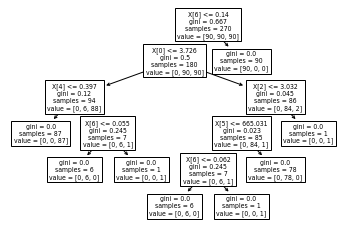

In [6]:
tree.plot_tree(treeModel) 

In [7]:
target_names = ['Inner', 'Outer', 'Healthy']
pred = treeModel.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred, target_names = target_names))

[[28  1  1]
 [ 0 30  0]
 [ 0  3 27]]
              precision    recall  f1-score   support

       Inner       1.00      0.93      0.97        30
       Outer       0.88      1.00      0.94        30
     Healthy       0.96      0.90      0.93        30

    accuracy                           0.94        90
   macro avg       0.95      0.94      0.94        90
weighted avg       0.95      0.94      0.94        90



In [8]:
pred_train = treeModel.predict(X_train)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train, target_names = target_names))

[[90  0  0]
 [ 0 90  0]
 [ 0  0 90]]
              precision    recall  f1-score   support

       Inner       1.00      1.00      1.00        90
       Outer       1.00      1.00      1.00        90
     Healthy       1.00      1.00      1.00        90

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



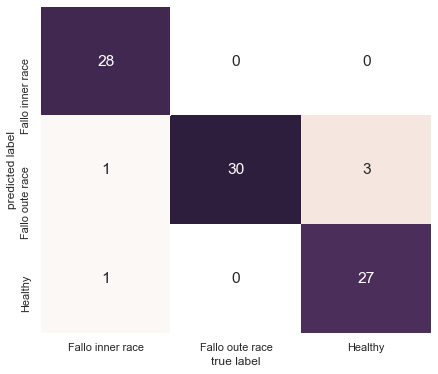

In [9]:
sns.set()
mat = confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(7,6))
sns.set(font_scale=1.3)
sns.heatmap(mat.T, square=False, annot=True, fmt='d', cbar=False,
            xticklabels=['Fallo inner race', 'Fallo oute race', 'Healthy'],
            yticklabels=['Fallo inner race', 'Fallo oute race', 'Healthy'],
            cmap=sns.cubehelix_palette(light=1, as_cmap=True))

plt.xlabel('true label');
plt.ylabel('predicted label');

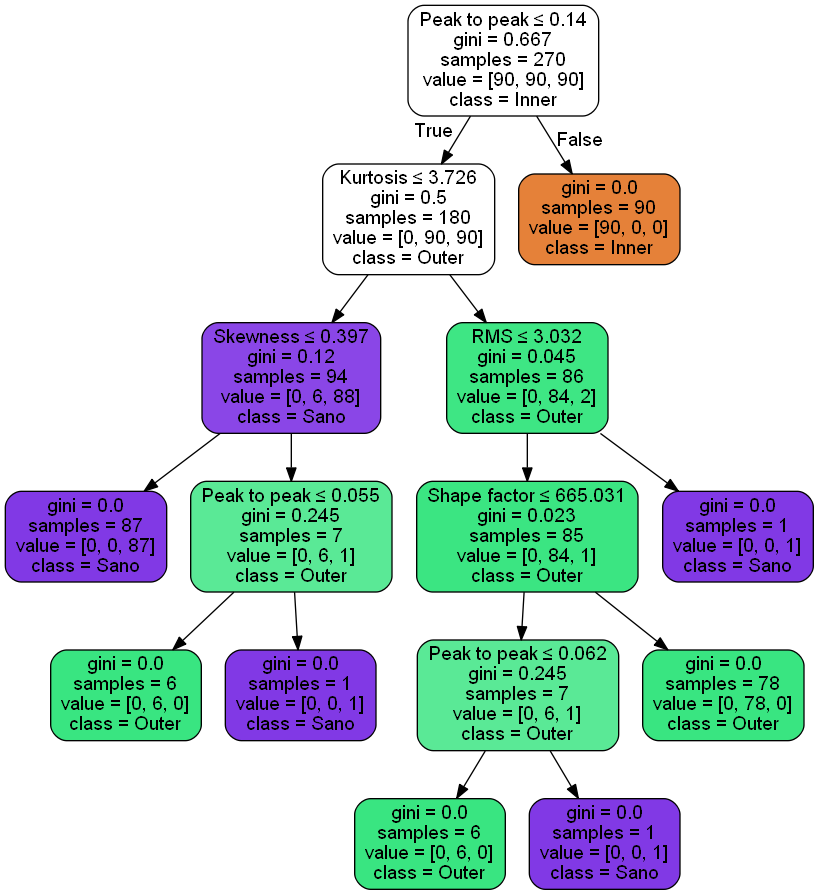

In [10]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
estadisticos = ['Kurtosis', 'Impulse factor', 'RMS', 'Margin factor', 'Skewness', 
                'Shape factor', 'Peak to peak', 'Crest factor']
export_graphviz(treeModel, out_file=dot_data,  
                filled=True, rounded = True,
                special_characters = True, feature_names = estadisticos, class_names = ['Inner', 'Outer', 'Sano'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree_hamming.png')
Image(graph.create_png())

In [11]:
joblib.dump(treeModel, 'tree_traintest_trained.pkl') # Guardo el modelo.

['tree_traintest_trained.pkl']